In [1]:
import numpy as np
import pandas
from matplotlib import pyplot as plt
from IPython.display import display, HTML
import geopandas
thisdir = '/home/idies/workspace/Storage/raddick/Baltimore/community_reinvestment_act/'
datadir = thisdir + 'datasets_for_analysis/'
shapefile_basedir = '/home/idies/workspace/Storage/raddick/Baltimore/shapefiles/'
census_shapefile_tiger_basedir = '/home/idies/workspace/Temporary/raddick/census_scratch/shapefiles/'

debug = 1

print('ok')

ok


In [2]:
df = pandas.read_csv(datadir+'reinvestment_by_census_tract_for_smallest_businesses.csv', encoding='utf-8')#, index_col=['census_tract', 'activity_year'])
df.columns.tolist()

cra_info_columns = ['census_tract', 'activity_year', 'income_group_code', 'income_group', 'cra_level']

cra_loan_columns = ['census_tract', 'nLoans1', 'nLoans100k', 'nLoans250k']
cra_loan_columns += ['nLoansToSmallest', 'nLoansTotal', 'nWorkingLoans']
cra_loan_columns += ['amtLoans1_adj', 'amtLoans100k_adj', 'amtLoans250k_adj']
cra_loan_columns += ['amtLoansToSmallest_adj', 'amtLoansTotal_adj', 'amtWorkingLoans_adj']

census_columns = ['census_tract', 'pop_total', 'total_householders', 'pop_white', 'pop_black']
census_columns += ['black_householder', 'white_householder', 'owner_occ_housing_units', 'mfi']
census_columns += ['female_householder', 'hs_grad_25plus', 'unemployed_16plus']
census_columns += ['poverty_past_12_months', 'median_home_value', 'median_year_built']
census_columns += ['pop_25plus', 'labor_force_16plus', 'poverty_status_known_last12months_total']

census_error_columns = ['census_tract', 'pop_total_err', 'total_householders_err', 'pop_white_err', 'pop_black_err']
census_error_columns += ['black_householder_err', 'white_householder_err', 'owner_occ_housing_units_err', 'mfi_err']
census_error_columns += ['female_householder_err', 'hs_grad_25plus_serr', 'unemployed_16plus_err']
census_error_columns += ['poverty_past_12_months_err', 'median_home_value_err', 'median_year_built_err']
census_error_columns += ['pop_25plus_serr', 'labor_force_16plus_err', 'poverty_status_known_last12months_total_err']

jobs_columns = ['census_tract']
jobs_columns += [x for x in df.columns.tolist() if 'jobs' in x.lower()]


census_tract_list = df['census_tract'].dropna().drop_duplicates().sort_values().tolist()

census_tracts_df = pandas.DataFrame(census_tract_list, columns=['census_tract'])
census_tracts_df = census_tracts_df.set_index('census_tract')
census_tracts_df = census_tracts_df.assign(nYears = df.groupby('census_tract').size())
census_tracts_df = census_tracts_df.join(df.groupby('census_tract')[cra_loan_columns].sum(), how='left')

census_tracts_df = census_tracts_df.join(df[jobs_columns][df['activity_year'] == 2015].set_index('census_tract'), how='left')

census_tracts_df = census_tracts_df.join(df[census_columns][df['activity_year'] == 2017].set_index('census_tract'), how='left')
census_tracts_df = census_tracts_df.join(df[census_error_columns][df['activity_year'] == 2017].set_index('census_tract'), how='left')

#census_tracts_df[census_tracts_df['nYears'] == 7].sample(1).T
#df.columns.tolist()


#et_columns = cra_loan_columns + ['Number of jobs for workers at firms with Firm Size: 0-19 Employees']
census_tracts_df = census_tracts_df.assign(nLoans1_per_sbjob = census_tracts_df['nLoans1'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
census_tracts_df = census_tracts_df.assign(nLoans100k_per_sbjob = census_tracts_df['nLoans100k'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
census_tracts_df = census_tracts_df.assign(nLoans250k_per_sbjob = census_tracts_df['nLoans250k'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
census_tracts_df = census_tracts_df.assign(nLoansToSmallest_per_sbjob = census_tracts_df['nLoansToSmallest'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
census_tracts_df = census_tracts_df.assign(nLoansTotal_per_sbjob = census_tracts_df['nLoansTotal'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
census_tracts_df = census_tracts_df.assign(nWorkingLoans_per_sbjob = census_tracts_df['nWorkingLoans'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
census_tracts_df = census_tracts_df.assign(amtLoans1_adj_per_sbjob = census_tracts_df['amtLoans1_adj'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
census_tracts_df = census_tracts_df.assign(amtLoans100k_adj_per_sbjob = census_tracts_df['amtLoans100k_adj'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
census_tracts_df = census_tracts_df.assign(amtLoans250k_adj_per_sbjob = census_tracts_df['amtLoans250k_adj'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
census_tracts_df = census_tracts_df.assign(amtLoansTotal_adj_per_sbjob = census_tracts_df['amtLoansTotal_adj'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])
census_tracts_df = census_tracts_df.assign(amtWorkingLoans_adj_per_sbjob = census_tracts_df['amtWorkingLoans_adj'] / census_tracts_df['Number of jobs for workers at firms with Firm Size: 0-19 Employees'])

print('backing up...')
census_tracts_df_bk = census_tracts_df
print('ok')

backing up...
ok


In [4]:
print('retrieving from backup...')
census_tracts_df_bk = census_tracts_df

census_tracts_df = census_tracts_df.assign(poverty_rate = census_tracts_df['poverty_past_12_months'] / census_tracts_df['poverty_status_known_last12months_total'])
census_tracts_df = census_tracts_df.assign(majority_race = np.nan)
census_tracts_df.loc[census_tracts_df['pop_black'] >= census_tracts_df['pop_white'], 'majority_race'] = 'black'
census_tracts_df.loc[census_tracts_df['pop_white'] > census_tracts_df['pop_black'], 'majority_race'] = 'white'

print('census tracts by majority race:')
print(census_tracts_df[census_tracts_df['nYears'] == 7].groupby('majority_race').size())

print('\n')

print('Quantiles of poverty rate in Baltimore city:')
print('Median {0:.1%}, richest decile {1:.1%}, richest quartile {2:.1%}, poorest quartile {3:.1%}, poorest decile {4:.1%}'.format(
    census_tracts_df['poverty_rate'][census_tracts_df['nYears'] == 7].quantile(0.5), 
    census_tracts_df['poverty_rate'][census_tracts_df['nYears'] == 7].quantile(0.1), 
    census_tracts_df['poverty_rate'][census_tracts_df['nYears'] == 7].quantile(0.25), 
    census_tracts_df['poverty_rate'][census_tracts_df['nYears'] == 7].quantile(0.75), 
    census_tracts_df['poverty_rate'][census_tracts_df['nYears'] == 7].quantile(0.9)
))
                                           
print('\n')
print("OK, sure, let's use Chicago's definition of low poverty as <= 10% poverty rate")

census_tracts_df = census_tracts_df.assign(poverty_class = np.nan)
census_tracts_df.loc[census_tracts_df['poverty_rate'] < 0.1, 'poverty_class'] = 'low'
census_tracts_df.loc[census_tracts_df['poverty_rate'] >= 0.1, 'poverty_class'] = 'high'

print('census tracts by poverty class:')
print(census_tracts_df[census_tracts_df['nYears'] == 7].groupby('poverty_class').size())

print('backing up...')
census_tracts_df_bk = census_tracts_df


retrieving from backup...
census tracts by majority race:
majority_race
black    129
white     58
dtype: int64


Quantiles of poverty rate in Baltimore city:
Median 22.1%, richest decile 7.6%, richest quartile 13.0%, poorest quartile 31.6%, poorest decile 41.2%


OK, sure, let's use Chicago's definition of low poverty as <= 10% poverty rate
census tracts by poverty class:
poverty_class
high    152
low      34
dtype: int64
backing up...


## Get shapefiles

Getting census tract shapefiles for 2017...
cutting out harbor...
backing up...


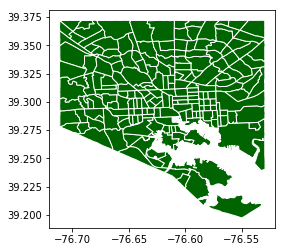

In [5]:
thisyear = 2017

if (debug > 0):
    print('Getting census tract shapefiles for {0:.0f}...'.format(thisyear))
tract_shapes_gdf = geopandas.read_file(census_shapefile_tiger_basedir +'{0:.0f}/TRACT/tl_{0:.0f}_24_tract.shp'.format(thisyear))
tract_shapes_gdf = tract_shapes_gdf[tract_shapes_gdf['COUNTYFP'] == '510']
tract_shapes_gdf.loc[:, 'NAME'] = pandas.to_numeric(tract_shapes_gdf['NAME'], errors='coerce')
tract_shapes_gdf = tract_shapes_gdf.assign(census_tract = pandas.to_numeric(tract_shapes_gdf['GEOID'].apply(lambda x: x[5:9]+'.'+x[9:]), errors='coerce'))
tract_shapes_gdf = tract_shapes_gdf.drop('GEOID', axis=1)
tract_shapes_gdf = tract_shapes_gdf.set_index('census_tract')

print('cutting out harbor...')
water_gdf = geopandas.read_file(shapefile_basedir+'water/water.shp')
water_gdf = water_gdf.to_crs(tract_shapes_gdf.crs)

tract_shapes_gdf = geopandas.overlay(tract_shapes_gdf, water_gdf[water_gdf['NAME'] == 'Harbor'], how='difference')

tract_shapes_gdf.plot(color='darkgreen', edgecolor='white')

print('backing up...')
tract_shapes_gdf_bk = tract_shapes_gdf

plt.show()


## Join shapefiles to data

In [6]:
print('getting from backup...')
census_tracts_df = census_tracts_df_bk
tract_shapes_gdf = tract_shapes_gdf_bk

census_tracts_df = census_tracts_df.join(tract_shapes_gdf, how='left')#, lsuffix='_loans', rsuffix='_shapes')#[['GEOID_loans', 'GEOID_shapes']]
census_tracts_gdf = geopandas.GeoDataFrame(census_tracts_df, crs=tract_shapes_gdf.crs)

print('backing up...')
census_tracts_gdf_bk = census_tracts_gdf

print('ok')


getting from backup...
backing up...
ok


In [ ]:
print('getting from backup...')
census_tracts_gdf = census_tracts_gdf_bk

census_tracts_gdf.plot()

#scale = 2

#fig, ax = plt.subplots(1,1,figsize=(20*scale,20*scale))

Majority Race,Median loan amount per small business job
white,"$53,452"
black,"$30,336"
Poverty class,Median loan amount per small business job
low,"$43,138"
high,"$36,411"


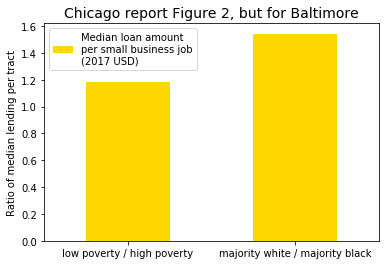

In [49]:
htmlstring = '<table>'
htmlstring += '<tr><th>Majority Race</th><th>Median loan amount per small business job</th></tr>'
htmlstring += '<tr><td>{0:}</td><td>${1:,.0f}</td></tr>'.format('white', census_tracts_df['amtWorkingLoans_adj_per_sbjob'][(census_tracts_df['nYears'] == 7) & (census_tracts_df['majority_race'] == 'white')].median())
htmlstring += '<tr><td>{0:}</td><td>${1:,.0f}</td></tr>'.format('black', census_tracts_df['amtWorkingLoans_adj_per_sbjob'][(census_tracts_df['nYears'] == 7) & (census_tracts_df['majority_race'] == 'black')].median())
htmlstring += '</table>'

htmlstring += '<p>&nbsp;</p>'

htmlstring += '<table>'
htmlstring += '<tr><th>Poverty class</th><th>Median loan amount per small business job</th></tr>'
htmlstring += '<tr><td>{0:}</td><td>${1:,.0f}</td></tr>'.format('low', census_tracts_df['amtWorkingLoans_adj_per_sbjob'][(census_tracts_df['nYears'] == 7) & (census_tracts_df['poverty_class'] == 'low')].median())
htmlstring += '<tr><td>{0:}</td><td>${1:,.0f}</td></tr>'.format('high', census_tracts_df['amtWorkingLoans_adj_per_sbjob'][(census_tracts_df['nYears'] == 7) & (census_tracts_df['poverty_class'] == 'high')].median())
htmlstring += '</table>'

display(HTML(htmlstring))

bar_chart_df = pandas.DataFrame(data=None, columns=['median_loan_amt_per_sbjob'])

bar_chart_df.loc['low poverty / high poverty', 'median_loan_amt_per_sbjob'] = (census_tracts_df['amtWorkingLoans_adj_per_sbjob'][census_tracts_df['poverty_class'] == 'low'].median() / census_tracts_df['amtWorkingLoans_adj_per_sbjob'][(census_tracts_df['nYears'] == 7) & (census_tracts_df['poverty_class'] == 'high')].median())
bar_chart_df.loc['majority white / majority black', 'median_loan_amt_per_sbjob'] = (census_tracts_df['amtWorkingLoans_adj_per_sbjob'][census_tracts_df['majority_race'] == 'white'].median() / census_tracts_df['amtWorkingLoans_adj_per_sbjob'][(census_tracts_df['nYears'] == 7) & (census_tracts_df['majority_race'] == 'black')].median())

fig, ax = plt.subplots(1,1)

bar_chart_df.plot.bar(ax=ax, color='gold')
plt.xticks(np.arange(0,2), bar_chart_df.index.values, rotation='horizontal')
plt.ylabel('Ratio of median lending per tract')
plt.legend(['Median loan amount\nper small business job\n(2017 USD)'])
plt.title('Chicago report Figure 2, but for Baltimore', fontsize=14)

plt.show()

In [ ]:
print('retrieving from backup...')
cra_level_df = cra_level_df_bk
thehtml = '<table>'
thehtml += '<tr><th>CRA level</th><th>Tracts</th><th>Amount of working loans</th><th>Small business jobs</th><th>Amt working loans per sb job</th></tr>'


for ix, thisrow in cra_level_df.iterrows():
    if (ix != 'unknown'):
        thehtml += '<tr>'
        thehtml += '<td>{0:}</td>'.format(ix)
        thehtml += '<td>{0:.0f}</td>'.format(thisrow['nTracts'])
        thehtml += '<td>${0:,.0f}</td>'.format(thisrow['amtWorkingLoans_adj'])
        thehtml += '<td>{0:,.0f}</td>'.format(thisrow['sbjobs_2015'])
        thehtml += '<td>${0:,.0f}</td>'.format(thisrow['amtWorkingLoans_adj_per_sbjob'])
        thehtml += '</tr>'
thehtml += '</table>'

display(HTML(thehtml))

fig, ax = plt.subplots(1,1)
cra_level_df[cra_level_df.index != 'unknown'].plot(y = 'amtWorkingLoans_adj_per_sbjob', ax=ax, marker='.', ms=10)
#plt.xticks(cra_level_df.index.values.tolist())
plt.xlabel('CRA income level', fontsize=14)
plt.xticks(np.arange(0,4), cra_level_df.index.tolist())
plt.ylim([50000,58000])
plt.ylabel('Working loan amount\nper small business job\n(USD2017)', fontsize=14)
ax.get_legend().remove()
plt.show()


    

In [ ]:

#print('backing up...')
df = df[[x for x in df.columns.tolist() if 'per_sbjob' not in x]]
#df = df[df.columns.tolist()[:-26]]

reference_columns = ['census_tract', 'activity_year']

cra_info_columns = ['CSA2010', 'income_group_code', 'income_group', 'cra_level']

loan_columns = [x for x in df.columns.tolist() if ('nLoans' in x or 'amtLoans' in x)]

get_columns = reference_columns + cra_info_columns + loan_columns

print('backing up...')
df_bk = df
print('ok')
#df[get_columns]




In [ ]:
print('getting from backup...') 
df = df_bk

#in2015_df = df[['census_tract', 'CSA2010', 'income_group_code', 'income_group', 'cra_level', 'Number of jobs for workers at firms with Firm Size: 0-19 Employees']][
#    df['activity_year'] == 2015
#].set_index('census_tract')

in2015_df.index.tolist()


In [ ]:

df.columns.tolist()
#df.set_index('census_tract').join(in2015_df, how='left')

columns_to_sum = ['nLoans1', 'amtLoans1', 'nLoans100k', 'amtLoans100k', 'nLoans250k', 'amtLoans250k']
columns_to_sum += ['nLoansToSmallest', 'amtLoansToSmallest', 'nLoansTotal', 'amtLoansTotal', 'nWorkingLoans', 'amtWorkingLoans']
columns_to_sum += ['amtLoans1_adj', 'amtLoans100k_adj', 'amtLoans250k_adj', 'amtLoansToSmallest_adj']
columns_to_sum += ['amtLoansTotal_adj', 'amtWorkingLoans_adj']

summed_df = df.groupby('census_tract')[columns_to_sum].sum().join(in2015_df, how='left')

summed_df = summed_df.rename(columns={'income_group_code': 'income_group_code_2015', 'income_group': 'income_group_2015', 'cra_level': 'cra_level_2015', 'Number of jobs for workers at firms with Firm Size: 0-19 Employees': 'sbjobs2015'})
summed_df = summed_df.assign(nLoans1_per_sbjob = summed_df['nLoans1'] / summed_df['sbjobs2015'])
summed_df = summed_df.assign(amtLoans1_adj_per_sbjob = summed_df['amtLoans1_adj'] / summed_df['sbjobs2015'])
summed_df = summed_df.assign(nLoans100k_per_sbjob = summed_df['nLoans100k'] / summed_df['sbjobs2015'])
summed_df = summed_df.assign(amtLoans100k_adj_per_sbjob = summed_df['amtLoans100k_adj'] / summed_df['sbjobs2015'])
summed_df = summed_df.assign(nLoans250k_per_sbjob = summed_df['nLoans250k'] / summed_df['sbjobs2015'])
summed_df = summed_df.assign(amtLoans250k_adj_per_sbjob = summed_df['amtLoans250k_adj'] / summed_df['sbjobs2015'])
summed_df = summed_df.assign(nLoansToSmallest_per_sbjob = summed_df['nLoansToSmallest'] / summed_df['sbjobs2015'])
summed_df = summed_df.assign(amtLoansToSmallest_adj_per_sbjob = summed_df['amtLoansToSmallest_adj'] / summed_df['sbjobs2015'])
summed_df = summed_df.assign(nLoansTotal_per_sbjob = summed_df['nLoansTotal'] / summed_df['sbjobs2015'])
summed_df = summed_df.assign(amtLoansTotal_adj_per_sbjob = summed_df['amtLoansTotal_adj'] / summed_df['sbjobs2015'])
summed_df = summed_df.assign(nWorkingLoans_per_sbjob = summed_df['nWorkingLoans'] / summed_df['sbjobs2015'])
summed_df = summed_df.assign(amtWorkingLoans_adj_per_sbjob = summed_df['amtWorkingLoans_adj'] / summed_df['sbjobs2015'])

summed_df['nLoans1_per_sbjob'].dropna()


    

In [ ]:


cra_level_df = pandas.DataFrame(summed_df.groupby('cra_level_2015').size(), columns=['nTracts'])

cra_level_df = cra_level_df.assign(nLoans1_per_sbjob = summed_df.groupby('cra_level_2015')['nLoans1_per_sbjob'].sum())
'''
cra_level_df = cra_level_df.assign(nLoans100k = df.groupby('cra_level')['nLoans100k'].sum())
cra_level_df = cra_level_df.assign(nLoans250k = df.groupby('cra_level')['nLoans250k'].sum())
cra_level_df = cra_level_df.assign(nLoansToSmallest = df.groupby('cra_level')['nLoansToSmallest'].sum())
cra_level_df = cra_level_df.assign(nLoansTotal = df.groupby('cra_level')['nLoansTotal'].sum())
cra_level_df = cra_level_df.assign(nWorkingLoans = df.groupby('cra_level')['nWorkingLoans'].sum())#

cra_level_df = cra_level_df.assign(amtLoans1_adj = df.groupby('cra_level')['amtLoans1_adj'].sum())
cra_level_df = cra_level_df.assign(amtLoans100k_adj = df.groupby('cra_level')['amtLoans100k_adj'].sum())
cra_level_df = cra_level_df.assign(amtLoans250k_adj = df.groupby('cra_level')['amtLoans250k_adj'].sum())
cra_level_df = cra_level_df.assign(amtLoansToSmallest_adj = df.groupby('cra_level')['amtLoansToSmallest_adj'].sum())
cra_level_df = cra_level_df.assign(amtLoansTotal_adj = df.groupby('cra_level')['amtLoansTotal_adj'].sum())
cra_level_df = cra_level_df.assign(amtWorkingLoans_adj = df.groupby('cra_level')['amtWorkingLoans_adj'].sum())

cra_level_df = cra_level_df.drop('unknown', axis=0)
'''
cra_level_df



In [ ]:

cra_level_df = cra_level_df.assign(sbjobs = df.groupby('cra_level')['Number of jobs for workers at firms with Firm Size: 0-19 Employees'].sum())

cra_level_df = cra_level_df.assign(nLoans1_per_sbjob = cra_level_df['nLoans1'] / cra_level_df['sbjobs'])
cra_level_df = cra_level_df.assign(nLoans100k_per_sbjob = cra_level_df['nLoans100k'] / cra_level_df['sbjobs'])
cra_level_df = cra_level_df.assign(nLoans250k_per_sbjob = cra_level_df['nLoans250k'] / cra_level_df['sbjobs'])
cra_level_df = cra_level_df.assign(nLoansToSmallest_per_sbjob = cra_level_df['nLoansToSmallest'] / cra_level_df['sbjobs'])
cra_level_df = cra_level_df.assign(nLoansTotal_per_sbjob = cra_level_df['nLoansTotal'] / cra_level_df['sbjobs'])
cra_level_df = cra_level_df.assign(nWorkingLoans_per_sbjob = cra_level_df['nWorkingLoans'] / cra_level_df['sbjobs'])

cra_level_df = cra_level_df.assign(amtLoans1_adj_per_sbjob = cra_level_df['amtLoans1_adj'] / cra_level_df['sbjobs'])
cra_level_df = cra_level_df.assign(amtLoans100k_adj_per_sbjob = cra_level_df['amtLoans100k_adj'] / cra_level_df['sbjobs'])
cra_level_df = cra_level_df.assign(amtLoans250k_adj_per_sbjob = cra_level_df['amtLoans250k_adj'] / cra_level_df['sbjobs'])
cra_level_df = cra_level_df.assign(amtLoansToSmallest_adj_per_sbjob = cra_level_df['amtLoansToSmallest_adj'] / cra_level_df['sbjobs'])
cra_level_df = cra_level_df.assign(amtLoansTotal_adj_per_sbjob = cra_level_df['amtLoansTotal_adj'] / cra_level_df['sbjobs'])
cra_level_df = cra_level_df.assign(amtWorkingLoans_adj_per_sbjob = cra_level_df['amtWorkingLoans_adj'] / cra_level_df['sbjobs'])

cra_level_df = cra_level_df.drop('unknown', axis=0)

print('Done!')
#amtLoans1_adj	amtLoans100k_adj	amtLoans250k_adj	amtLoansToSmallest_adj	amtLoansTotal_adj